# **WALMART SALES ANALYSIS**

Tanaya Dutt

#### **1. Importing the Data**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\jyoti\Documents\Walmart_Store_Sales.csv')

#### **2. Getting to know the data**

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.shape

(6435, 8)

#### **3. Basic Data Cleaning**

In [6]:
df.isnull().sum()
#We have no missing records/values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
#Convert date from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

In [8]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [9]:
df['month_name'] = df['Date'].dt.month_name()


In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year,month_name
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,February
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,February
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,February
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,February
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,March


In [11]:
df = df.drop(columns = ['month'])

In [12]:
df= df.drop(columns = ['Date'])

In [13]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,year,month_name
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,February
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,February
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2010,February
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2010,February
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,March


###  **Exploratory Data Analysis**

Q1. Which Store has the maximum sales?

In [14]:
#Lets groupby first by store
store_sales = df.groupby('Store')['Weekly_Sales'].sum()

#Max sales store
max_sales_store = store_sales.idxmax()
max_sales_amount = store_sales.max()

print(f'Maximum sales store : {max_sales_store}')
print(f'Maximum sales amount : {max_sales_amount}')

Maximum sales store : 20
Maximum sales amount : 301397792.46


Q2. Which holidays have the highest and lowest sales than the mean weekly sales?

In [15]:
#Mean sales
mean_sales = df['Weekly_Sales'].mean()
print(f'{mean_sales}')

1046964.8775617715


In [16]:
#holiday_sales
holiday_sales = df[df['Holiday_Flag'] == 1]

holiday_sales['above_mean'] = holiday_sales['Weekly_Sales'] > mean_sales

holiday_above_mean = holiday_sales[holiday_sales['above_mean']]

print(f'{holiday_above_mean}')


      Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
1         1    1641957.44             1        38.51       2.548  211.242170   
31        1    1507460.69             1        78.69       2.565  211.495190   
42        1    1955624.11             1        64.52       2.735  211.748433   
47        1    1367320.01             1        48.43       2.943  211.404932   
53        1    1649614.93             1        36.39       3.022  212.936705   
...     ...           ...           ...          ...         ...         ...   
5819     41    1264014.16             1        34.12       3.119  196.358610   
5825     41    1238844.56             1        22.00       3.103  196.919506   
5855     41    1392143.82             1        67.41       3.596  198.095048   
6334     45    1182500.16             1        46.15       3.039  182.783277   
6386     45    1170672.94             1        48.71       3.492  188.350400   

      Unemployment  day  year month_nam

C:\Users\jyoti\AppData\Local\Temp\ipykernel_4364\3108044173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_sales['above_mean'] = holiday_sales['Weekly_Sales'] > mean_sales


Q3. Best Sales Year

In [17]:
#Yearly Sales
year_sales =  df.groupby('year')['Weekly_Sales'].sum()
max_year_sales  = year_sales.idxmax()

print(f'Maximum Sales By Year : {max_year_sales}')

Maximum Sales By Year : 2011


Q4. Correlation

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   day           6435 non-null   int32  
 8   year          6435 non-null   int32  
 9   month_name    6435 non-null   object 
dtypes: float64(5), int32(2), int64(2), object(1)
memory usage: 452.6+ KB


<Axes: >

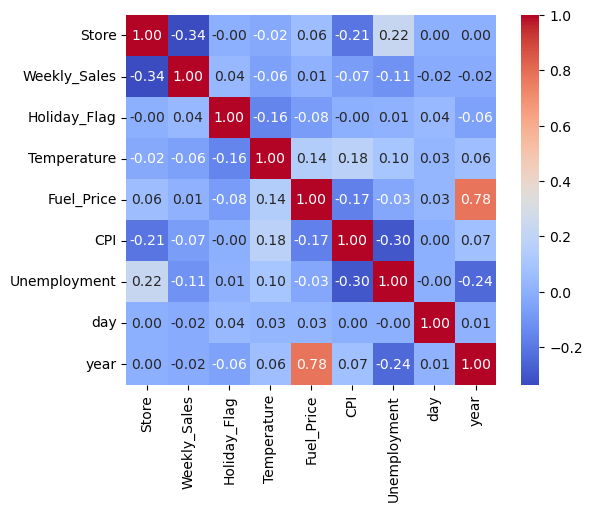

In [20]:
df_corr = df.drop(columns = ['month_name'])
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot = True,  fmt=".2f", cmap="coolwarm", square=True)

Q5. Scatterplots

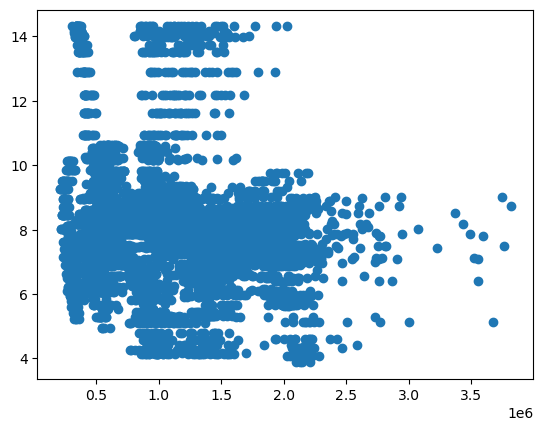

In [21]:
plt.scatter(x = df['Weekly_Sales'],y = df['Unemployment'])

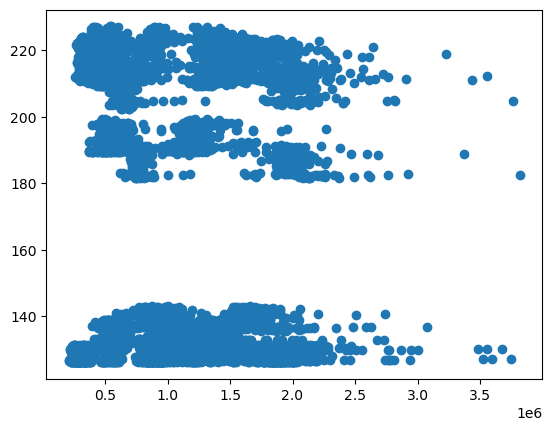

In [22]:
plt.scatter(x = df['Weekly_Sales'],y = df['CPI'])

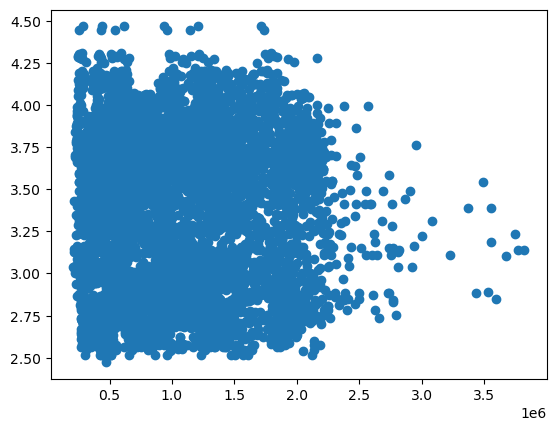

In [23]:
plt.scatter(x = df['Weekly_Sales'],y = df['Fuel_Price'])

Q6. How do CPI and fuel prices vary over time, do they show any seasonal patterns?

In [24]:
monthly_cpi_fuel = df.groupby('month_name')[['CPI','Fuel_Price']].mean()

In [25]:
monthly_cpi_fuel = monthly_cpi_fuel.reindex(["January", "February", "March", "April", "May", "June", 
                                             "July", "August", "September", "October", "November", "December"])

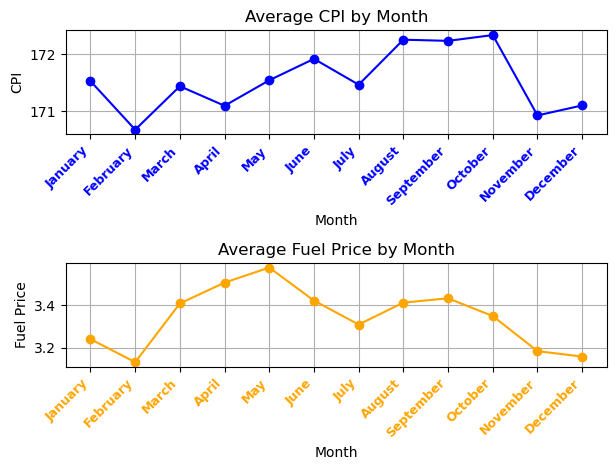

In [33]:

plt.subplot(2, 1, 1)
plt.plot(monthly_cpi_fuel.index, monthly_cpi_fuel['CPI'], marker='o', color='blue')
plt.title("Average CPI by Month")
plt.xlabel("Month")
plt.ylabel("CPI")
plt.xticks( color='blue', rotation=45, fontweight='bold', fontsize='9', horizontalalignment='right')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(monthly_cpi_fuel.index, monthly_cpi_fuel['Fuel_Price'], marker='o', color='orange')
plt.title("Average Fuel Price by Month")
plt.xlabel("Month")
plt.ylabel("Fuel Price")
plt.xticks( color='orange', rotation=45, fontweight='bold', fontsize='9', horizontalalignment='right')
plt.grid(True)

plt.tight_layout()
plt.show()


Q7. Linear Regression to check the Impach of External Factors on Weekly Sales

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Selecting features for the linear regression model
features = df[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
target = df['Weekly_Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating and training the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error :{mse}')
print(f'R2 Score :{r2}')


Mean Squared Error :316554511405.115
R2 Score :0.01738312550370069
